In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import plotly
from plotly_secrets import username, api_key
plotly.tools.set_credentials_file(username=username, api_key=api_key)

In [2]:
df_google_sheet = pd.read_csv("./Job_applied_data - Sheet1.csv")

In [3]:
df_google_sheet.shape

(1694, 7)

In [4]:
df_google_sheet.head()

,Subject,Timestamp,From address,Description,state,reply,comment
0,"EEO survey for Machine Learning/NLP Engineer, ...",11/26/2018 21:47:15,Workable <noreply@candidates.workablemail.com>,NaN,NaN,NaN,NaN
1,Indeed Application: Machine Learning/NLP Engineer,11/26/2018 21:32:05,Indeed Apply <indeedapply@indeed.com>,NaN,NaN,NaN,NaN
2,You applied for Data Scientist - Investment Te...,11/26/2018 21:37:40,LinkedIn <jobs-listings@linkedin.com>,NaN,NaN,NaN,NaN
3,Indeed Application: Data Scientist,11/26/2018 21:36:50,Indeed Apply <indeedapply@indeed.com>,NaN,NaN,NaN,NaN
4,Indeed Application: Data Scientist,11/26/2018 22:15:55,Indeed Apply <indeedapply@indeed.com>,NaN,NaN,NaN,NaN


## Data Formatting

In [7]:
df_google_sheet['Timestamp']=pd.to_datetime(df_google_sheet['Timestamp'])

df_google_sheet['date'] = df_google_sheet['Timestamp'].dt.date
df_google_sheet['time'] = df_google_sheet['Timestamp'].dt.time

In [8]:
#add weeks
df_google_sheet['time'] = df_google_sheet['Timestamp'].dt.week

## When did i start?

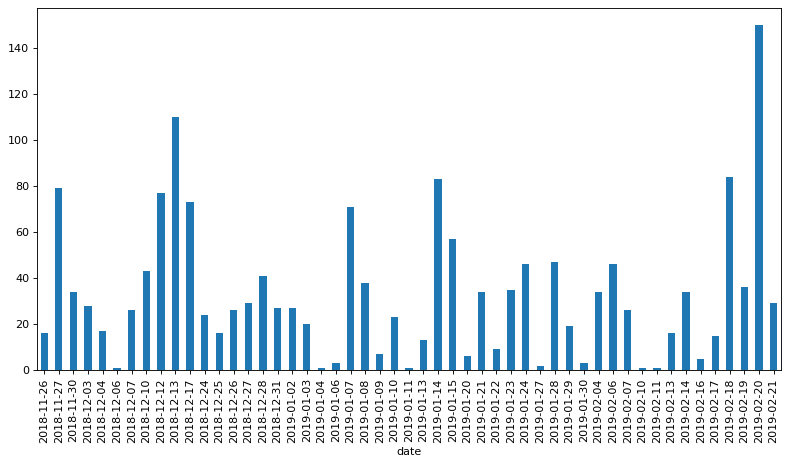

In [12]:
#3 month project
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

df_google_sheet['date'].groupby(df_google_sheet["date"]).count().plot(kind="bar")
plt.show()

## How many replied

In [13]:
df_reply = df_google_sheet[df_google_sheet.reply.notnull()]

In [14]:
df_reply.shape

(17, 9)

In [16]:
#how much percentage of success: atleast replied:
print("Percentage of success:", (df_reply.shape[0] * 100)/(df_google_sheet.shape[0]))


Percentage of success: 1.0035419126328218


In [17]:
df_reply

,Subject,Timestamp,From address,Description,state,reply,comment,date,time
53,Thank you for applying to W2O,2018-11-27 17:50:03,no-reply@greenhouse.io,"Harish Gandhi,\r\n\r\nThanks for applying to W...",NaN,Yes on 27th Nov. request to apply on their web...,NaN,2018-11-27,48.0
86,"Thank you for applying at Gecko Robotics, Inc.",2018-11-27 20:51:28,"""Gecko Robotics, Inc."" <notifications@app.bamb...","\n\nHi Harish Gandhi,\n\nThank you for your i...",NaN,code challenge,NaN,2018-11-27,48.0
131,You applied for Data Analyst at Oxford Road,2018-12-03 22:30:12,LinkedIn <jobs-listings@linkedin.com>,Your application is on its way. Good luck!\r\n...,NaN,viewed,NaN,2018-12-03,49.0
135,You applied for Data Scientist at Montway Auto...,2018-12-03 22:11:28,LinkedIn <jobs-listings@linkedin.com>,Your application is on its way. Good luck!\r\n...,NaN,viewed,NaN,2018-12-03,49.0
139,You applied for Data Scientist at Qordoba,2018-12-03 21:52:42,LinkedIn <jobs-listings@linkedin.com>,Your application is on its way. Good luck!\r\n...,NaN,viewed,NaN,2018-12-03,49.0
160,Indeed Application: SYSTEMS ENGINEER,2018-12-04 12:20:32,Indeed Apply <indeedapply@indeed.com>,Your application was sent to careers@tradingte...,"chicago,IL",Trading technologies 1 . Coding round2.Phone i...,NaN,2018-12-04,49.0
220,Thank you for applying at Foundation Finance C...,2018-12-10 09:36:43,Foundation Finance <notifications@app.bamboohr...,"\n\nHi Harish Gandhi,\n\nThank you so much fo...",WI,REJECT - 01/05/2019 - ROUND 2,Lack of business knwoledge,2018-12-10,50.0
230,Indeed Application: Data Scientist,2018-12-10 09:26:03,Indeed Apply <indeedapply@indeed.com>,Your application has been submitted. Good luck...,splitwise,questionair->rejected,mainly because of my answers,2018-12-10,50.0
482,Indeed Application: Data Analytics Specialist,2018-12-17 08:22:49,Indeed Apply <indeedapply@indeed.com>,Your application has been submitted. Good luck...,NaN,phone interview - 12/26/2018,NaN,2018-12-17,51.0
525,Your Application has been Received,2018-12-24 07:57:37,"""hr@torc.ai"" <hr@torc.ai>",Harish\r\nThank you for beginning your applica...,NaN,hackerrank challenge: 01/03/2019,NaN,2018-12-24,52.0


## How many are useful for me?

In [19]:
mask = df_google_sheet['reply'].notnull() | df_google_sheet['comment'].notnull()
df_useful = df_google_sheet[mask]

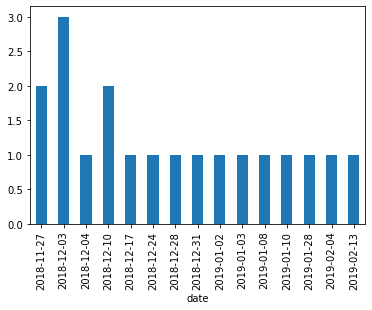

In [20]:
#get the timestamp for those you got selected:
df_useful['Timestamp'].groupby(df_useful["date"]).count().plot(kind="bar")
plt.show()

In [21]:
date_set = set(df_useful.date)

# Heroku Dataset

In [23]:
dfHeroku = pd.read_csv("./dataclips_grtpfygjpkgldevhfidwrgddjxkg.csv")

In [24]:
dfHeroku['Timestamp']=pd.to_datetime(dfHeroku['timestamp'])

dfHeroku['date'] = dfHeroku['Timestamp'].dt.date
dfHeroku['time'] = dfHeroku['Timestamp'].dt.time

# Connect Email + DB


## Case: Within a week data

Assumption: Recruiters click your resume within a week timeline. So collect all the job application within that week

In [25]:
df_empty = dfHeroku[0:0]

In [26]:
dfHeroku

,id,resume_link,category_name,timestamp,user_agent,platform,browser,Timestamp,date,time
0,65,btpersonalwebsite,se,2018-11-27 03:20:44.798446,10.30.69.116,linux,firefox,2018-11-27 03:20:44.798446,2018-11-27,03:20:44.798446
1,66,bttalk,se,2018-11-27 03:20:52.938949,10.30.69.116,linux,firefox,2018-11-27 03:20:52.938949,2018-11-27,03:20:52.938949
2,67,newsoptimism,da,2018-11-27 18:10:38.851526,10.81.247.113,NaN,NaN,2018-11-27 18:10:38.851526,2018-11-27,18:10:38.851526
3,68,thirukurral,da,2018-11-27 18:10:38.852017,10.16.252.107,NaN,NaN,2018-11-27 18:10:38.852017,2018-11-27,18:10:38.852017
4,69,mediumblog,da,2018-11-27 18:10:39.50262,10.95.189.103,NaN,NaN,2018-11-27 18:10:39.502620,2018-11-27,18:10:39.502620
...,...,...,...,...,...,...,...,...,...,...
475,604,foodfda,da,2019-07-11 21:53:36.278464,10.81.166.115,macos,firefox,2019-07-11 21:53:36.278464,2019-07-11,21:53:36.278464
476,605,personalwebsite,se,2019-08-18 23:15:05.579001,10.51.192.112,linux,firefox,2019-08-18 23:15:05.579001,2019-08-18,23:15:05.579001
477,606,personalwebsite,se,2019-09-21 19:28:08.650478,10.63.192.219,linux,firefox,2019-09-21 19:28:08.650478,2019-09-21,19:28:08.650478
478,607,personalwebsite,ds,2019-09-25 21:35:07.224956,10.45.241.211,windows,firefox,2019-09-25 21:35:07.224956,2019-09-25,21:35:07.224956


In [28]:
all_possible_mask = []
for each_date in date_set:
    end_date = each_date+ datetime.timedelta(days=7)#within 7days
    mask = (df_google_sheet['date'] >= each_date) & (df_google_sheet['date'] <= end_date)
    df_empty = df_empty.append(dfHeroku[mask]).drop_duplicates().reset_index(drop=True)
    all_possible_mask.append(mask)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [29]:
df_empty.drop(['timestamp', 'Timestamp', 'time'], axis=1)

,id,resume_link,category_name,user_agent,platform,browser,date
0,295,github,ds,10.113.253.66,windows,chrome,2019-01-08
1,296,chicagocrime,ds,10.16.240.138,windows,chrome,2019-01-08
2,297,tptalk,ds,10.111.196.146,windows,chrome,2019-01-08
3,298,thirukurral,ds,10.97.190.232,windows,chrome,2019-01-08
4,299,personalwebsite,se,10.13.234.117,macos,chrome,2019-01-08
...,...,...,...,...,...,...,...
458,189,newsoptimism,ds,10.45.110.114,windows,msie,2018-12-27
459,190,btpersonalwebsite,ds,10.166.115.234,windows,msie,2018-12-27
460,191,diagnozer,ds,10.43.205.176,windows,msie,2018-12-27
461,192,github,ds,10.97.207.215,windows,msie,2018-12-27


### Out of all the applications which category is noticied

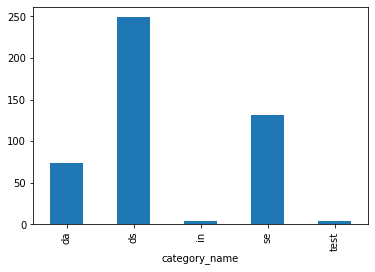

In [30]:
df_empty['id'].groupby(df_empty["category_name"]).count().plot(kind="bar")
plt.show()

In [35]:
x = sorted(['ds', 'da', 'se'])

github_click_counts = []
btpersonalwebsite_click_counts = []
bttalk_click_counts = []
chicagocrime_click_counts = []
diagnozer_click_counts = []
foodfda_click_counts = []

gta_click_counts = []
mediumblog_click_counts = []
newsoptimism_click_counts = []
paper_click_counts = []
personalwebsite_click_counts = []
thirukurral_click_counts = []
tptalk_click_counts = []

print(x)


for category in sorted(x):
    github_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'github')].count())
    btpersonalwebsite_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'btpersonalwebsite')].count())
    bttalk_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'bttalk')].count())
    chicagocrime_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'chicagocrime')].count())
    diagnozer_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'diagnozer')].count())
    foodfda_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'foodfda')].count())
    gta_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'gta')].count())
    mediumblog_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'mediumblog')].count())
    newsoptimism_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'newsoptimism')].count())
    paper_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'paper')].count())
    personalwebsite_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'personalwebsite')].count())
    thirukurral_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'thirukurral')].count())
    tptalk_click_counts.append(dfHeroku['resume_link'][(dfHeroku['category_name'] == category) & (dfHeroku['resume_link'] == 'tptalk')].count())


['da', 'ds', 'se']


In [36]:
github_click_counts

[6, 14, 3]

In [48]:

import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=x,
    y=github_click_counts,
    name='Github'
)
trace2 = go.Bar(
    x=x,
    y=btpersonalwebsite_click_counts,
    name='btpersonalwebsite'
)
trace3 = go.Bar(
    x=x,
    y=bttalk_click_counts,
    name='bttalk'
)
trace4 = go.Bar(
    x=x,
    y=chicagocrime_click_counts,
    name='chicagocrime'
)
trace5 = go.Bar(
    x=x,
    y=diagnozer_click_counts,
    name='diagnozer'
)


trace6 = go.Bar(
    x=x,
    y=foodfda_click_counts,
    name='foodfda'
)
trace7 = go.Bar(
    x=x,
    y=gta_click_counts,
    name='gta'
)
trace8 = go.Bar(
    x=x,
    y=mediumblog_click_counts,
    name='mediumblog'
)
trace9 = go.Bar(
    x=x,
    y=newsoptimism_click_counts,
    name='newsoptimism'
)
trace10 = go.Bar(
    x=x,
    y=paper_click_counts,
    name='paper'
)

trace11 = go.Bar(
    x=x,
    y=personalwebsite_click_counts,
    name='personalwebsite'
)
trace12 = go.Bar(
    x=x,
    y=thirukurral_click_counts,
    name='thirukurral'
)
trace13 = go.Bar(
    x=x,
    y=tptalk_click_counts,
    name='tptalk'
)




data = [trace1, trace2, trace3, trace4, trace5,trace6, trace7, trace8, trace9, trace10,trace11, trace12, trace13]

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Clicks Count per Category',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))


layout = go.Layout(xaxis = dict(title = 'Category Type',
    ),        yaxis = dict(title = 'Click Counts'),
    barmode='stack')

layout['annotations'] = annotations



fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


#### Observation:

Personal webpage is important!

Incase of categories:
1. DA -> Talks in the top and *Food FDA*
2. DS -> Diagonizer(Computer vision)
3. SE -> Thirukural


Note: Consider the talks in the DS resume type: bottom talk is equally likely to be clicked than the top talk.

## Job description and the links that is connected to that: